In [1]:
import os
import json
kaggle_token = {
    "username": "dhanajeyahemanthb",
    "key": "be2511a99e9c708dfb8512aace625179"
}
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)
os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("✅ Kaggle authentication setup completed.")


✅ Kaggle authentication setup completed.


In [2]:
!kaggle datasets download -d meetnagadia/malaria-dataset

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/malaria-dataset
License(s): DbCL-1.0
  0% 0.00/6.18M [00:00<?, ?B/s]
100% 6.18M/6.18M [00:00<00:00, 1.42GB/s]


In [3]:
!unzip -q malaria-dataset.zip -d malaria_dataset

In [4]:
!ls

malaria_dataset  malaria-dataset.zip  sample_data


In [5]:
!ls malaria_dataset

Dataset


In [6]:
base_path = "malaria_dataset/Dataset"

In [7]:
import os
classes = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.
join(base_path, folder))]
print("Classes found in dataset:", classes)

Classes found in dataset: ['Test', 'Train']


In [8]:
train_dir = "malaria_dataset/Dataset/Train"
test_dir = "malaria_dataset/Dataset/Test"


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
train_dir,
target_size=(64, 64),
batch_size=32,
class_mode='categorical')
val_data = datagen.flow_from_directory(
test_dir,
target_size=(64, 64),
batch_size=32,
class_mode='categorical'
)

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
MaxPooling2D(2,2),
Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(2,2),
Flatten(),
Dense(128, activation='relu'),
Dense(train_data.num_classes, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4936 - loss: 0.9804

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.4947 - loss: 0.9703 - val_accuracy: 0.6791 - val_loss: 0.6875
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.6217 - loss: 0.6888 - val_accuracy: 0.6791 - val_loss: 0.6763
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.5750 - loss: 0.6654 - val_accuracy: 0.5821 - val_loss: 0.6771
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7382 - loss: 0.6089 - val_accuracy: 0.5373 - val_loss: 0.6879
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.7772 - loss: 0.5322 - val_accuracy: 0.3955 - val_loss: 0.9011


In [16]:
img_path="/content/malaria_dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_97.png"

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path="/content/malaria_dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_97.png"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: Uninfected


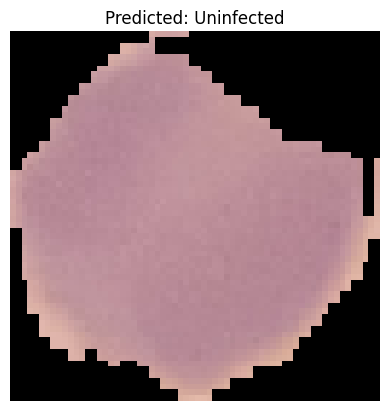

In [19]:
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
# Class labels
class_labels = list(train_data.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")
# Display image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()